<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0105EN-SkillsNetwork/labs/Module2/images/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Add your code below following the instructions given in the course


# The Best Christmas Singer


Hi Coursera fellows. I just love Christmas songs... don't know why, but they make me happy. 

So, this notebook analyzes the artists with the most "Christmas hits" in a dataset provided by Tidy Tuesday.

In [1]:
# We start by importing the dataset and viewing 5 sample rows

christmas_songs <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-24/christmas_songs.csv")

head(christmas_songs, 5)

Parsed with column specification:
cols(
  url = col_character(),
  weekid = col_character(),
  week_position = col_double(),
  song = col_character(),
  performer = col_character(),
  songid = col_character(),
  instance = col_double(),
  previous_week_position = col_double(),
  peak_position = col_double(),
  weeks_on_chart = col_double(),
  year = col_double(),
  month = col_double(),
  day = col_double()
)


url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://www.billboard.com/charts/hot-100/1958-12-13,12/13/1958,83,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,NA,69,3,1958,12,13
http://www.billboard.com/charts/hot-100/1958-12-20,12/20/1958,57,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1,NA,29,19,1958,12,20
http://www.billboard.com/charts/hot-100/1958-12-20,12/20/1958,73,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,83,69,3,1958,12,20
http://www.billboard.com/charts/hot-100/1958-12-20,12/20/1958,86,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1,NA,12,13,1958,12,20
http://www.billboard.com/charts/hot-100/1958-12-27,12/27/1958,44,GREEN CHRI$TMA$,Stan Freberg,Green Chri$tma$Stan Freberg,1,NA,44,2,1958,12,27


In [2]:
# Here we find out the max and min value of "week_position." A higher week_position means a more popular song (strnage, I know)

print(max_value <- max(christmas_songs$week_position))
print(min_value <- min(christmas_songs$week_position))

[1] 100
[1] 7


In [3]:
# Here we import a library that will help us keep just the columns we're interested in performer and week_position (higher = better)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
new_songs <- christmas_songs %>%
  select(performer, week_position)
head(new_songs, 5)

performer,week_position
<chr>,<dbl>
Chuck Berry,83
Bobby Helms,57
Chuck Berry,73
Bing Crosby,86
Stan Freberg,44


In [5]:
# We rename the values performer with "Singer" and week_position with "Position." So the plot will be more user-friendly

new_songs <- new_songs %>%
  rename(Singer = performer, Position = week_position)
head(new_songs, 3)

Singer,Position
<chr>,<dbl>
Chuck Berry,83
Bobby Helms,57
Chuck Berry,73


In [6]:
# We have to understand with how many songs we're dealing with

glimpse(new_songs)

Rows: 387
Columns: 2
$ Singer   <chr> "Chuck Berry", "Bobby Helms", "Chuck Berry", "Bing Crosby", …
$ Position <dbl> 83, 57, 73, 86, 44, 66, 69, 35, 45, 53, 70, 83, 89, 80, 76, …


This notebook is about the artist with the most Christmas hits. But... what's a Christmas hit?

Well, here I define a Christmas hit as a Christmas song that has a Position score higher than 93.

In [7]:
# We filter for the songs that have a Position score above 93

filtered_songs <- new_songs %>%
  filter(Position > 93)

In [8]:
# This is le library that will help us create the plot

library(ggplot2)

## Plot & Results

The plot below displays the names of the singers on the X-axis and their total position (i.e., the sum of the positions of all their Christmas hits) on the Y-axis.

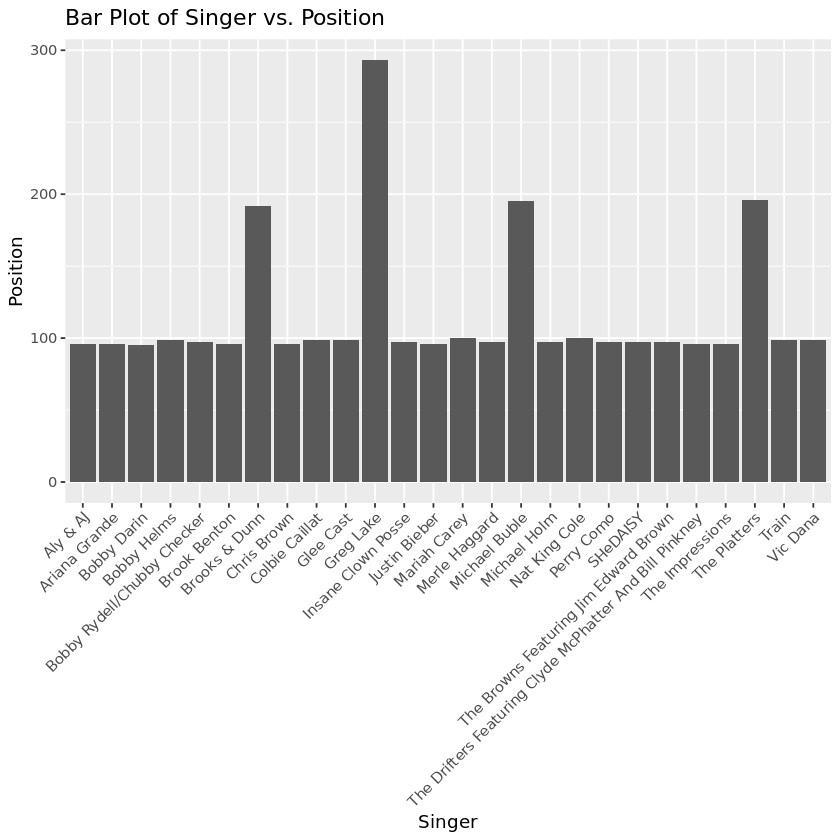

In [9]:
# With a little help from ChatGPT we create the plot

ggplot(filtered_songs, aes(x = Singer, y = Position)) +
  geom_bar(stat = "identity") +
  labs(x = "Singer", y = "Position") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Bar Plot of Singer vs. Position")

And the winner is... **Greg Lake**

## Author
Matteo :)